In [18]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

# from retrieval.data_retriever import DataRetriever

In [19]:
folder = "../../data/bitcoin/blocks/"
files = os.listdir(folder)
len(files)

5515

**DOWNLOAD DATA**: uncomment the following cell to download the data.

In [20]:
# data_retriever = DataRetriever(coin="bitcoin", dataset_name="blocks")
# data_retriever.save_dataset(base_path="../../data")

In [21]:
dfs = []

for file in files:
    try :
        file_path = folder + file
       
        df = pd.read_csv(file_path, sep='\t', header=None, skiprows=1, nrows=1, compression='gzip')
        # add the date to the dataframe
        date = file.split("_")[-1][:-7]
        date = pd.to_datetime(date, format="%Y%m%d")
        df["Timestamp"] = date
        dfs.append(df)
    except:
        print(file)
        continue
    

headers = pd.read_csv(file_path, sep='\t', nrows=0)
df = pd.concat(dfs, ignore_index=True)
df.columns = headers.columns.append(pd.Index(["Timestamp"]))

In [22]:
df.head()

,id,hash,time,median_time,size,stripped_size,weight,version,version_hex,version_bits,...,fee_per_kb_usd,fee_per_kwu,fee_per_kwu_usd,cdd_total,generation,generation_usd,reward,reward_usd,guessed_miner,Timestamp
0,170431,00000000000009657ca18097bba889b79f8bb175f7f64b...,2012-03-10 00:01:49,2012-03-09 23:46:59,9447,9447,37788,1,1,1,...,0.0024,12185.9,0.0006,4.176429e+01,5000000000,244.500,5000450000,244.5220,Unknown,2012-03-10
1,271007,0000000000000001a68b9a0c5f20679d30294a2c44fe9b...,2013-11-23 00:08:37,2013-11-22 23:34:34,555178,555178,2220712,2,2,10,...,0.4582,12772.4,0.1146,1.403724e+06,2500000000,22422.250,2528137487,22674.6133,Eligius,2013-11-23
2,644473,0000000000000000000ed063d923e8ebc1f6e9bdf2dfb6...,2020-08-20 01:01:11,2020-08-19 23:08:24,1368478,874833,3992977,536870912,20000000,100000000000000000000000000000,...,14.8773,43246.2,5.0991,3.316947e+06,625000000,73693.875,797621106,94047.6641,Binance,2020-08-20
3,373348,00000000000000000853f853637f2cd64e1747a04be625...,2015-09-07 00:11:19,2015-09-06 23:18:26,515178,515178,2060712,3,3,11,...,0.1077,11202.1,0.0269,9.596840e+03,2500000000,6011.000,2522902418,6066.0664,Eligius,2015-09-07
4,378774,000000000000000001cb03a82c18858b8d18b3cc82641f...,2015-10-14 00:14:54,2015-10-13 23:06:46,749192,749192,2996768,3,3,11,...,0.1288,12916.6,0.0322,9.263493e+03,2500000000,6233.000,2538695464,6329.4756,AntPool,2015-10-14


<Axes: xlabel='Timestamp'>

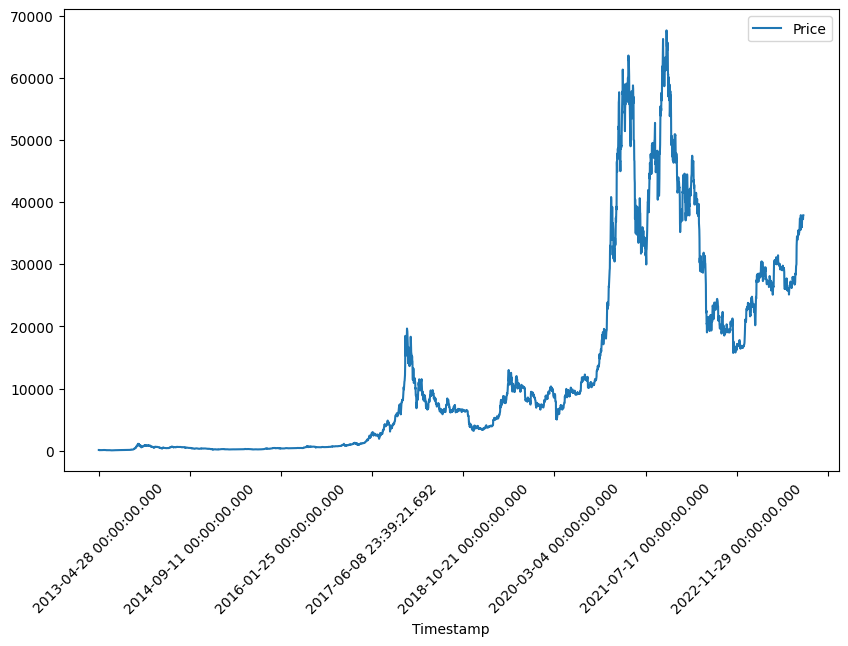

In [23]:
df_price = pd.read_csv("../../data/bitcoin/price/bitcoin_chart.csv")
df_price.plot(x='Timestamp', y='Price', kind='line', figsize=(10, 6), rot=45)

In [24]:
start_date = df_price['Timestamp'].min()
end_date = df_price['Timestamp'].max()

print(start_date, end_date)

2013-04-28 00:00:00.000 2023-11-29 00:39:58.000


In [25]:
df['time'] = pd.to_datetime(df['time'])
low_limit = pd.to_datetime('2013-04-28')

sliced_df = df[df['time'] >= start_date].copy()
sliced_df = sliced_df[sliced_df['time'] <= end_date].copy()

sliced_df.sort_values(by='Timestamp', inplace=True)
sliced_df["Timestamp"] = pd.to_datetime(sliced_df['Timestamp']).dt.date
sliced_df

,id,hash,time,median_time,size,stripped_size,weight,version,version_hex,version_bits,...,fee_per_kb_usd,fee_per_kwu,fee_per_kwu_usd,cdd_total,generation,generation_usd,reward,reward_usd,guessed_miner,Timestamp
664,233475,00000000000000002dd37b66645642de4d42d17b62abf2...,2013-04-28 00:02:41,2013-04-27 22:21:42,237138,237138,948552,2,2,10,...,0.2307,44193.900,0.0577,17353.434168,2500000000,3262.50,2541883647,3317.1582,SlushPool,2013-04-28
2543,233652,000000000000010782f261a2a7fc7315aa6c1932ee000c...,2013-04-29 00:00:36,2013-04-28 23:17:45,249139,249139,996556,2,2,10,...,0.3302,62396.200,0.0825,306642.724724,2500000000,3307.50,2562129894,3389.6980,SlushPool,2013-04-29
2117,233826,000000000000015a89c36e24ac7f7a607f2d117fb0f81d...,2013-04-30 00:04:35,2013-04-29 22:48:34,249093,249093,996372,2,2,10,...,0.2780,49273.700,0.0695,6712.985459,2500000000,3525.75,2549050000,3594.9253,50BTC,2013-04-30
1990,233975,0000000000000039c832ad9c1f31816d0fae10e08fceaa...,2013-05-01 00:07:39,2013-04-30 23:45:48,159937,159937,639748,2,2,10,...,0.2094,37672.500,0.0524,11140.403638,2500000000,3474.50,2524070002,3507.9524,BTC Guild,2013-05-01
4240,234126,000000000000007dd445f5ea1f3344afdf607d42380fbf...,2013-05-02 00:04:19,2013-05-01 23:32:59,170921,170921,683684,2,2,10,...,0.1788,36977.100,0.0447,13556.723010,2500000000,3021.75,2525250002,3052.2698,SlushPool,2013-05-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1168,818335,00000000000000000000b03effab300ecd510f6560684e...,2023-11-25 00:14:31,2023-11-24 23:46:15,1573438,806519,3992995,939524096,38000000,111000000000000000000000000000,...,16.3142,17038.918,6.4292,80983.335404,625000000,235825.00,693017915,261489.5156,Foundry USA Pool,2023-11-25
1216,818494,000000000000000000005e83e8b273c7004004acc0f22d...,2023-11-26 00:04:13,2023-11-25 22:47:20,1977040,671996,3993028,857890816,33226000,110011001000100110000000000000,...,11.3901,14926.215,5.6401,12285.215010,625000000,236168.75,684584673,258684.0156,Foundry USA Pool,2023-11-26
3850,818640,00000000000000000004045398d8cc6d59753162c286fe...,2023-11-27 00:06:01,2023-11-26 23:24:24,1841302,717379,3993439,805298176,2fffe000,101111111111111110000000000000,...,15.7676,19407.873,7.2714,11002.679804,625000000,234162.50,702475280,263189.3750,ViaBTC,2023-11-27
5252,818770,000000000000000000024de2bda08beb4885cd772cff05...,2023-11-28 00:26:15,2023-11-27 22:50:13,1507859,828406,3993077,721600512,2b02c000,101011000000101100000000000000,...,31.4854,31886.125,11.8903,56974.896242,625000000,233062.50,752289315,280528.6875,Foundry USA Pool,2023-11-28


In [26]:
df_price['Timestamp'] = pd.to_datetime(df_price['Timestamp']).dt.date
df_price

,Timestamp,Price,Market_Cap,Total_Volume
0,2013-04-28,135.300000,1.500518e+09,0.000000e+00
1,2013-04-29,141.960000,1.575032e+09,0.000000e+00
2,2013-04-30,135.300000,1.501657e+09,0.000000e+00
3,2013-05-01,117.000000,1.298952e+09,0.000000e+00
4,2013-05-02,103.430000,1.148668e+09,0.000000e+00
...,...,...,...,...
3862,2023-11-26,37809.852866,7.395367e+11,7.505380e+09
3863,2023-11-27,37491.838186,7.333768e+11,1.022911e+10
3864,2023-11-28,37250.169051,7.280402e+11,1.797913e+10
3865,2023-11-29,37802.236044,7.388169e+11,1.971554e+10


In [27]:
df_price['Timestamp'] = pd.to_datetime(df_price['Timestamp'])
sliced_df['Timestamp'] = pd.to_datetime(sliced_df['Timestamp'])

merged_df = pd.merge(sliced_df, df_price, on='Timestamp', how='inner')
merged_df

,id,hash,time,median_time,size,stripped_size,weight,version,version_hex,version_bits,...,cdd_total,generation,generation_usd,reward,reward_usd,guessed_miner,Timestamp,Price,Market_Cap,Total_Volume
0,233475,00000000000000002dd37b66645642de4d42d17b62abf2...,2013-04-28 00:02:41,2013-04-27 22:21:42,237138,237138,948552,2,2,10,...,17353.434168,2500000000,3262.50,2541883647,3317.1582,SlushPool,2013-04-28,135.300000,1.500518e+09,0.000000e+00
1,233652,000000000000010782f261a2a7fc7315aa6c1932ee000c...,2013-04-29 00:00:36,2013-04-28 23:17:45,249139,249139,996556,2,2,10,...,306642.724724,2500000000,3307.50,2562129894,3389.6980,SlushPool,2013-04-29,141.960000,1.575032e+09,0.000000e+00
2,233826,000000000000015a89c36e24ac7f7a607f2d117fb0f81d...,2013-04-30 00:04:35,2013-04-29 22:48:34,249093,249093,996372,2,2,10,...,6712.985459,2500000000,3525.75,2549050000,3594.9253,50BTC,2013-04-30,135.300000,1.501657e+09,0.000000e+00
3,233975,0000000000000039c832ad9c1f31816d0fae10e08fceaa...,2013-05-01 00:07:39,2013-04-30 23:45:48,159937,159937,639748,2,2,10,...,11140.403638,2500000000,3474.50,2524070002,3507.9524,BTC Guild,2013-05-01,117.000000,1.298952e+09,0.000000e+00
4,234126,000000000000007dd445f5ea1f3344afdf607d42380fbf...,2013-05-02 00:04:19,2013-05-01 23:32:59,170921,170921,683684,2,2,10,...,13556.723010,2500000000,3021.75,2525250002,3052.2698,SlushPool,2013-05-02,103.430000,1.148668e+09,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3862,818494,000000000000000000005e83e8b273c7004004acc0f22d...,2023-11-26 00:04:13,2023-11-25 22:47:20,1977040,671996,3993028,857890816,33226000,110011001000100110000000000000,...,12285.215010,625000000,236168.75,684584673,258684.0156,Foundry USA Pool,2023-11-26,37809.852866,7.395367e+11,7.505380e+09
3863,818640,00000000000000000004045398d8cc6d59753162c286fe...,2023-11-27 00:06:01,2023-11-26 23:24:24,1841302,717379,3993439,805298176,2fffe000,101111111111111110000000000000,...,11002.679804,625000000,234162.50,702475280,263189.3750,ViaBTC,2023-11-27,37491.838186,7.333768e+11,1.022911e+10
3864,818770,000000000000000000024de2bda08beb4885cd772cff05...,2023-11-28 00:26:15,2023-11-27 22:50:13,1507859,828406,3993077,721600512,2b02c000,101011000000101100000000000000,...,56974.896242,625000000,233062.50,752289315,280528.6875,Foundry USA Pool,2023-11-28,37250.169051,7.280402e+11,1.797913e+10
3865,818917,00000000000000000003196161752f0bc8c2d13caaa280...,2023-11-29 00:31:07,2023-11-28 22:19:47,1532908,819956,3992776,1073733632,3fffe000,111111111111111110000000000000,...,51083.113205,625000000,236081.25,713826108,269633.5312,Foundry USA Pool,2023-11-29,37802.236044,7.388169e+11,1.971554e+10


In [28]:
def hash_to_int(hash_string):
    return int(hash_string, 16)

for index, row in merged_df.iterrows():
    merged_df.at[index, 'hash'] = hash_to_int(row['hash'])
    merged_df.at[index, 'merkle_root'] = hash_to_int(row['merkle_root'])
    merged_df.at[index, 'chainwork'] = hash_to_int(row['chainwork'])
    merged_df.at[index, 'coinbase_data_hex'] = hash_to_int(row['coinbase_data_hex'])

In [29]:
merged_df['hash'] = pd.to_numeric(merged_df['hash'])
merged_df['merkle_root'] = pd.to_numeric(merged_df['merkle_root'])
merged_df['chainwork'] = pd.to_numeric(merged_df['chainwork'])
merged_df['coinbase_data_hex'] = pd.to_numeric(merged_df['coinbase_data_hex'])

In [30]:
# print column that are not numeric
for column in merged_df.columns:
    if not pd.api.types.is_numeric_dtype(merged_df[column]):
        print(column)

time
median_time
version_hex
version_bits
guessed_miner
Timestamp


In [31]:
# drop the median time column
merged_df.drop(columns=['median_time', 'version_hex', 'version_bits', 'guessed_miner', 'id', 'time'], inplace=True)
merged_df.to_csv("../../data/bitcoin/merged.csv", index=False)

In [32]:
import pandas as pd
import matplotlib.pyplot as plt

merged_df = pd.read_csv("../../data/bitcoin/merged.csv")
merged_df['Timestamp'] = pd.to_datetime(merged_df['Timestamp'])

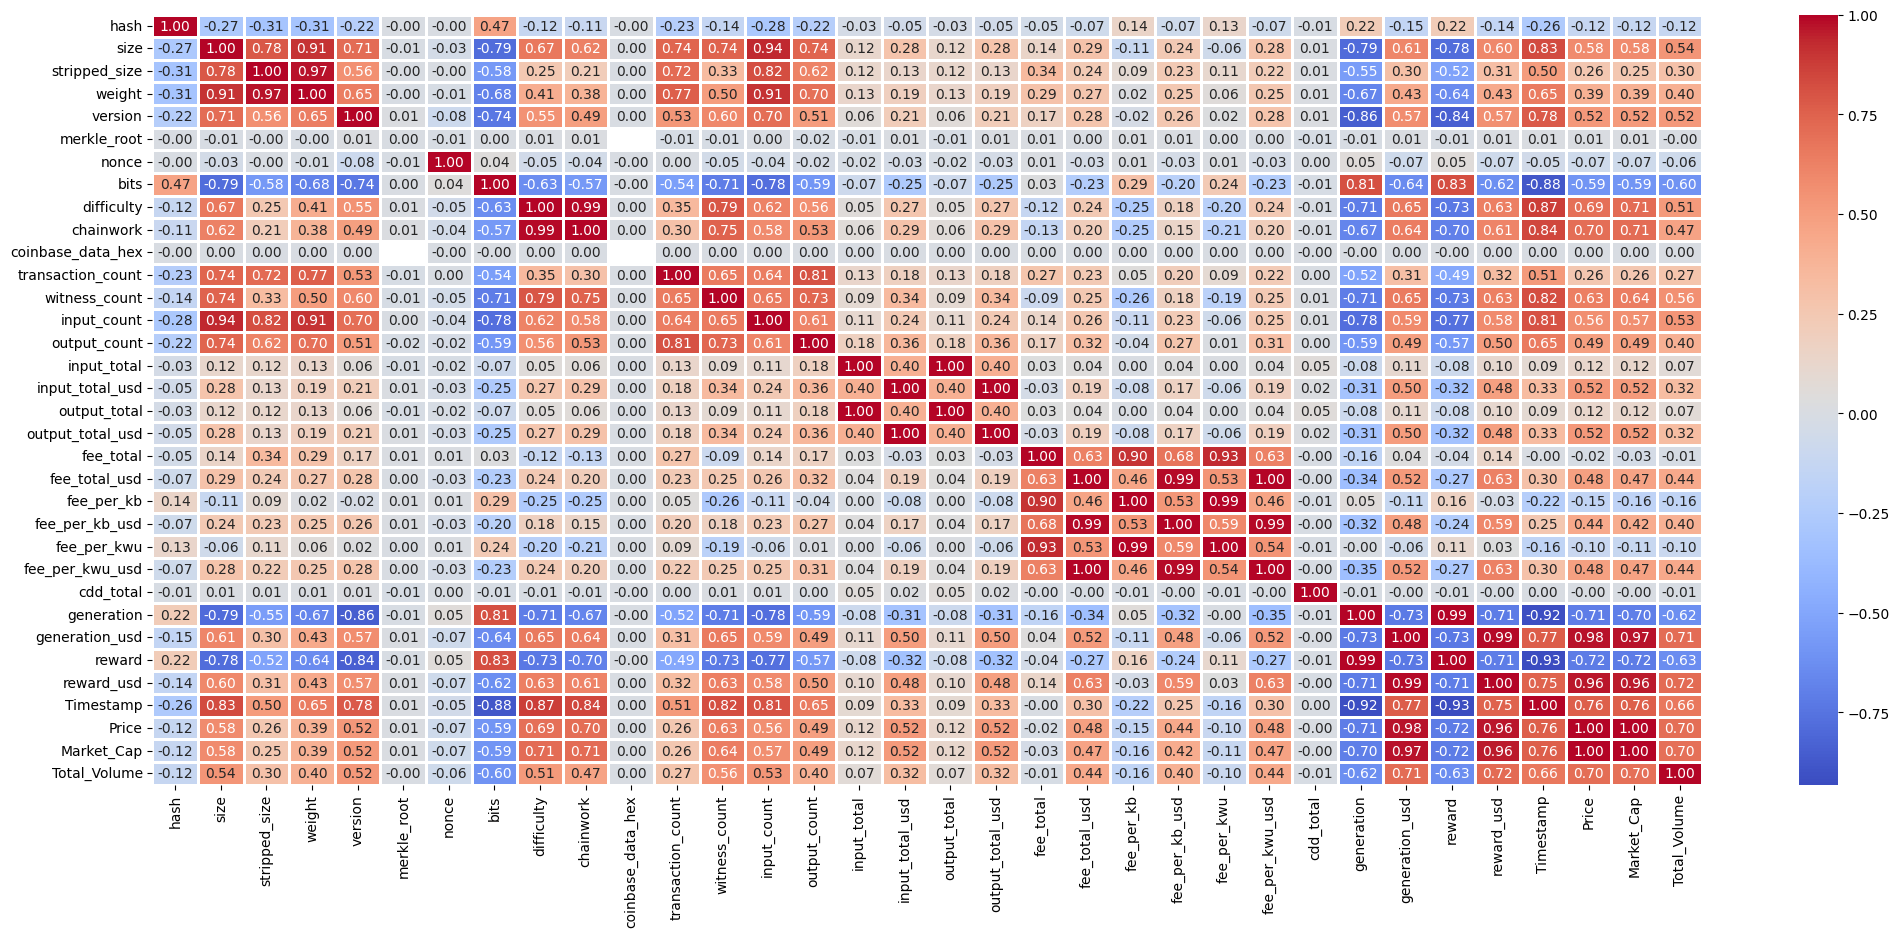

In [33]:
import seaborn as sns

# compute corr matrix 
corr_matrix = merged_df.corr()

# plot the correlation matrix
plt.figure(figsize=(25, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=1)
plt.show()

In [34]:
# save the dataframe
merged_df.to_csv("../../data/bitcoin/merged.csv", index=False)